In [2]:
#A) Data & Library Import

In [3]:
from platform import python_version
print(python_version())

3.7.13


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/6156_Group_Assignment

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/6156_Group_Assignment'
/content


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
data = files.upload()
import io
df = pd.read_csv(io.BytesIO(data['Diagnosis_all.csv'])) #, names=names)
# Interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()
df

Saving Diagnosis_all.csv to Diagnosis_all.csv


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4960,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [7]:
#B) EDA

In [8]:
#Checking null
df.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [9]:
#Checking null
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
#information about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [11]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Check skewness
df.skew()

# Skewness between -0.5 and 0.5, the data are fairly symmetrical.
# Skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
# Skewness is less than -1 or greater than 1, the data are highly skewed

#df has HIGHLY SKEWED variables. Since, it will be predicting the diseases, for now it is decided not to ameliorate the skewness.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


itching                 2.099195
skin_rash               1.855249
nodal_skin_eruptions    6.524656
continuous_sneezing     4.382999
shivering               6.524656
                          ...   
small_dents_in_nails    6.340020
inflammatory_nails      6.340020
blister                 6.340020
red_sore_around_nose    6.310616
yellow_crust_ooze       6.340020
Length: 132, dtype: float64

In [13]:
# Check balance of dependent variable
df['prognosis'].value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


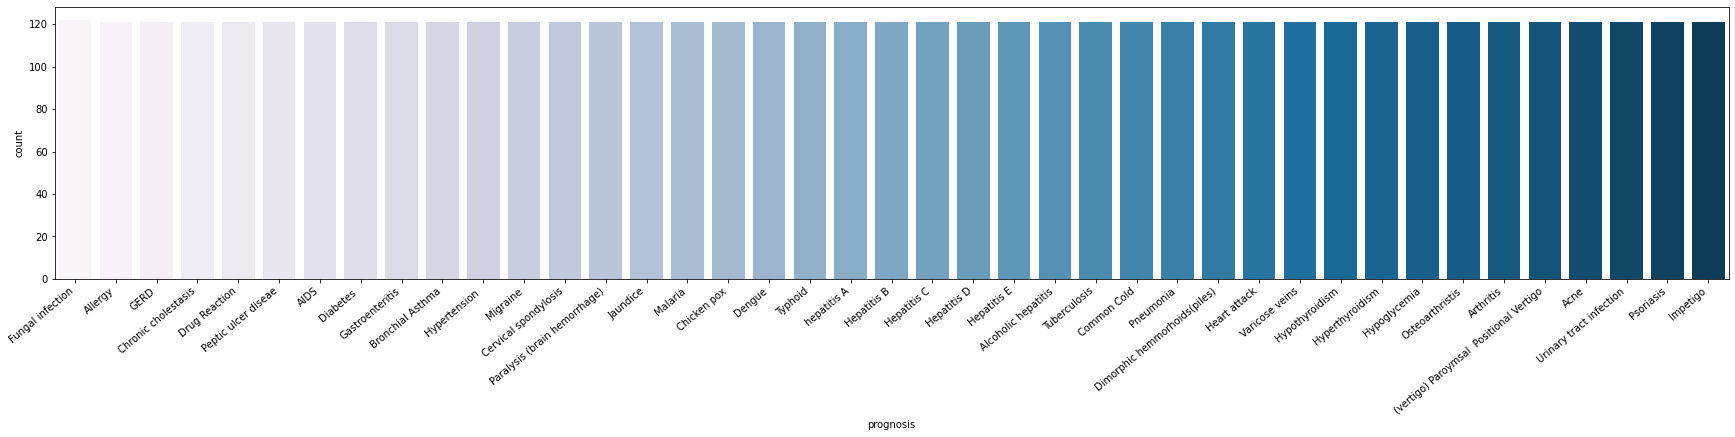

In [14]:
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(df['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

#from the below plot, we get to know that there are 121 samples for each disease and we don't hav eto further balance the dataset.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


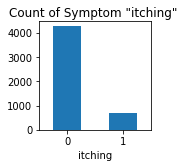

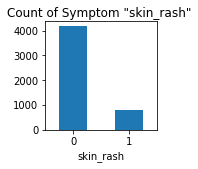

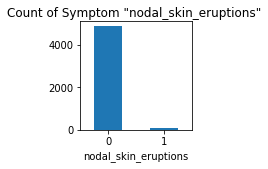

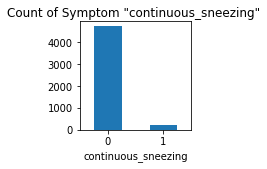

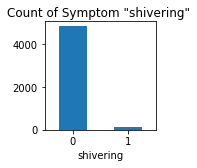

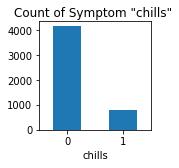

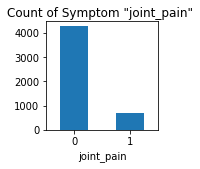

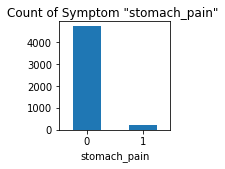

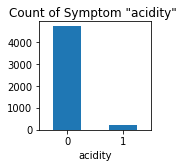

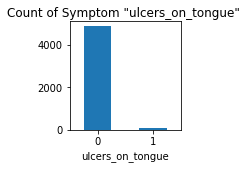

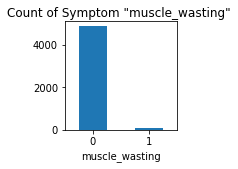

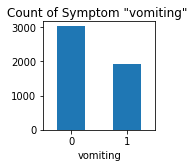

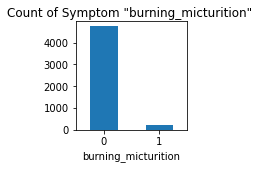

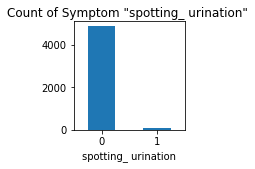

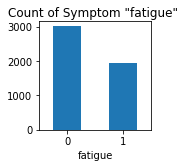

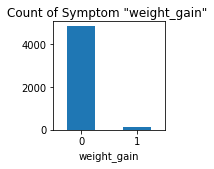

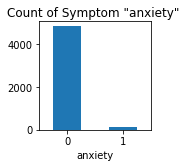

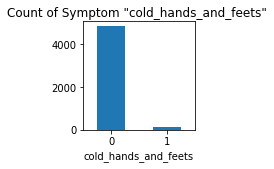

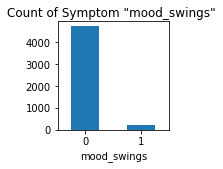

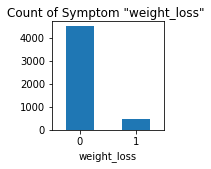

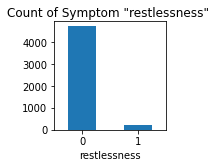

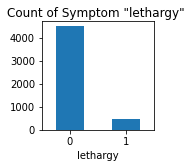

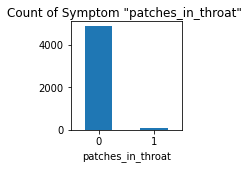

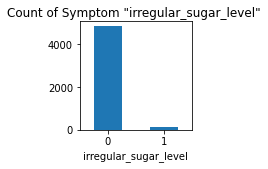

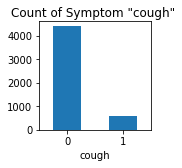

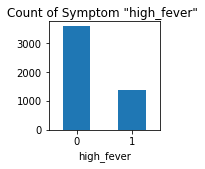

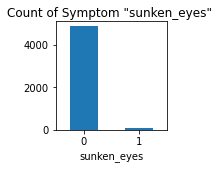

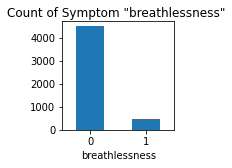

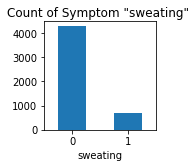

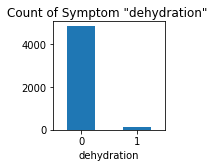

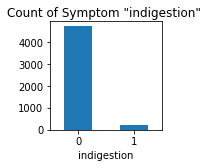

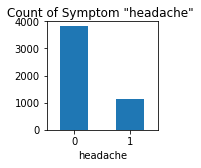

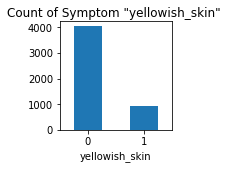

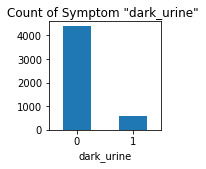

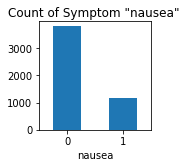

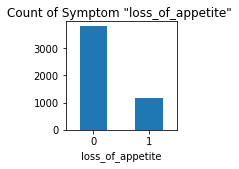

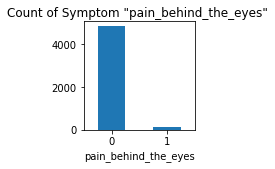

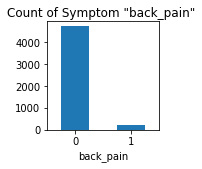

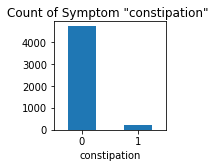

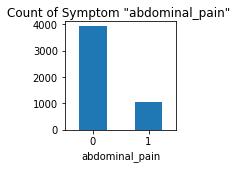

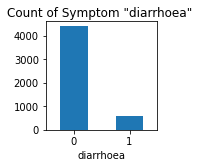

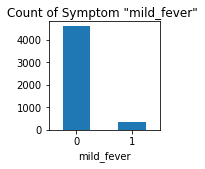

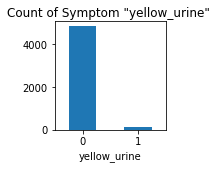

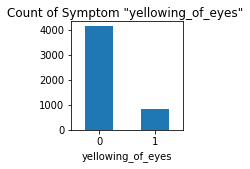

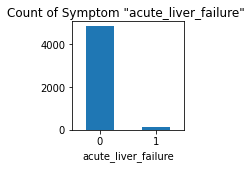

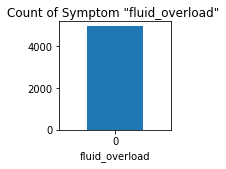

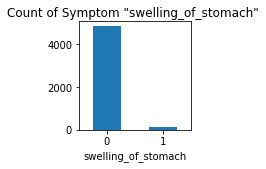

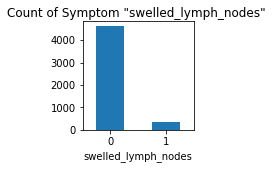

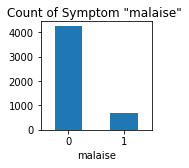

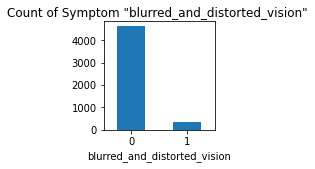

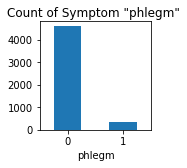

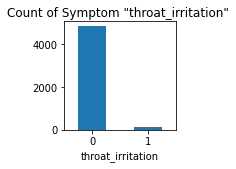

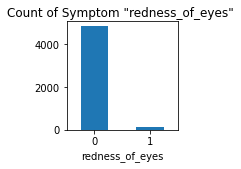

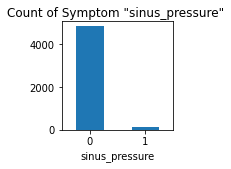

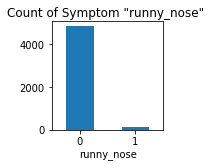

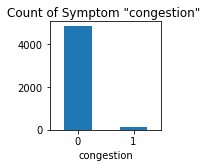

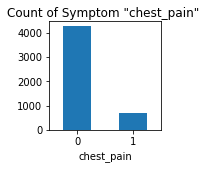

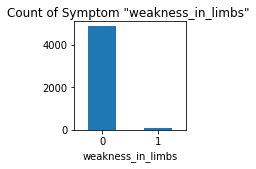

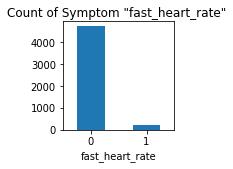

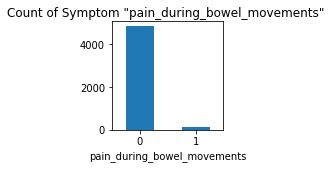

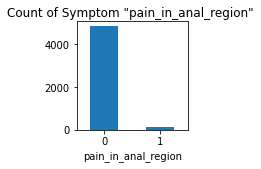

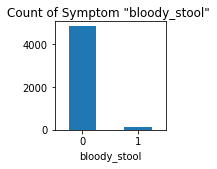

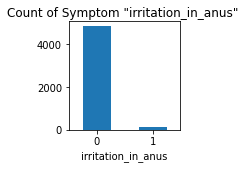

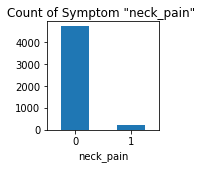

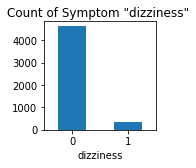

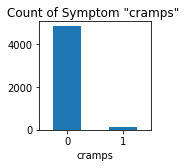

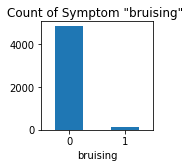

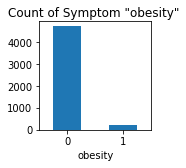

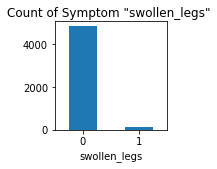

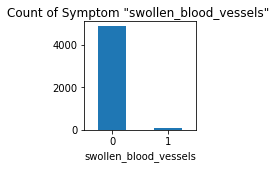

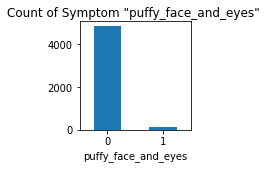

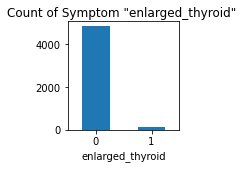

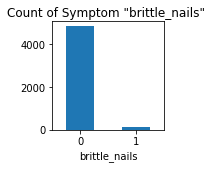

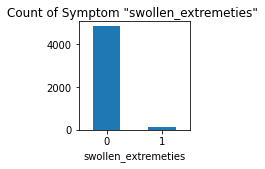

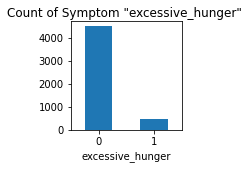

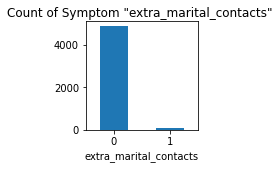

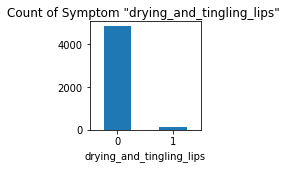

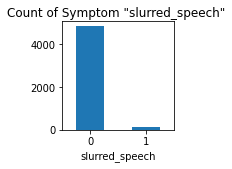

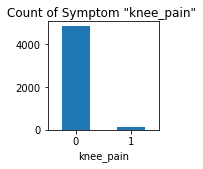

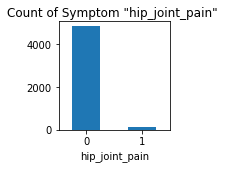

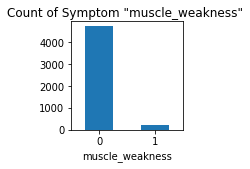

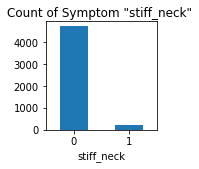

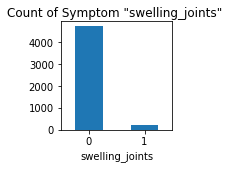

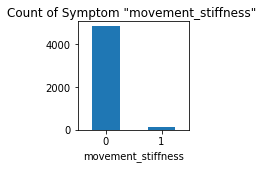

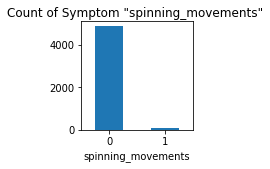

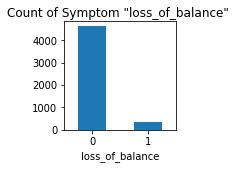

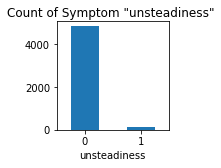

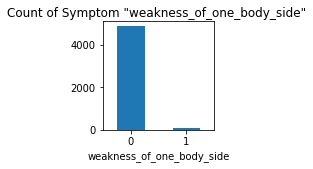

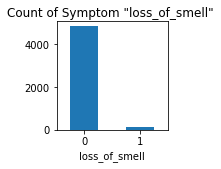

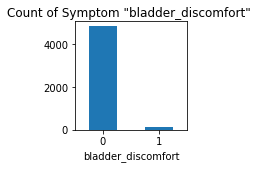

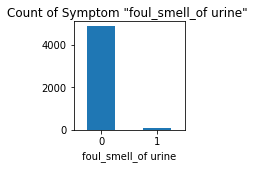

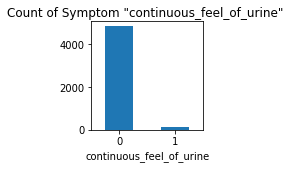

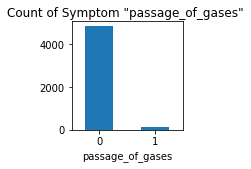

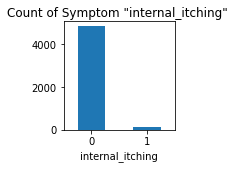

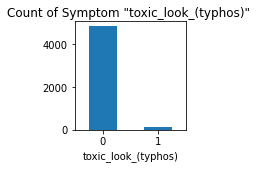

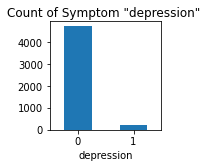

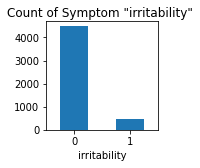

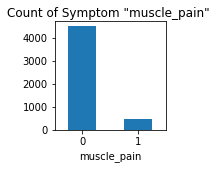

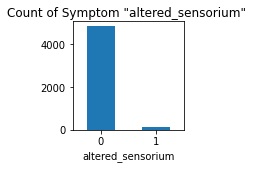

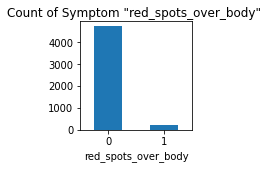

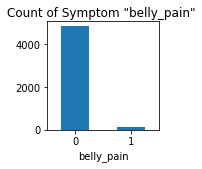

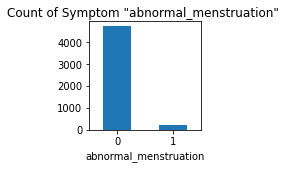

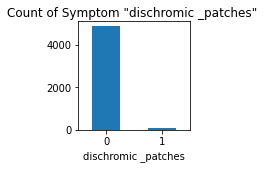

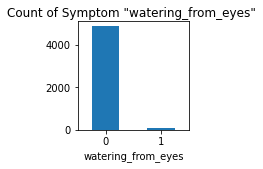

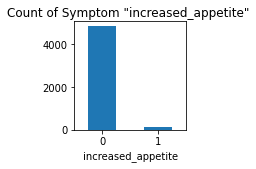

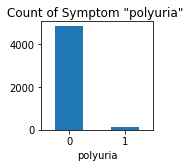

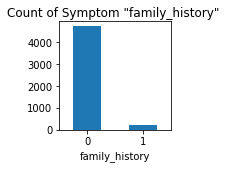

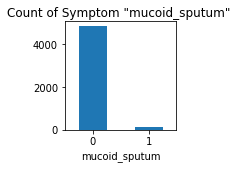

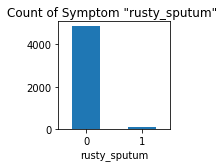

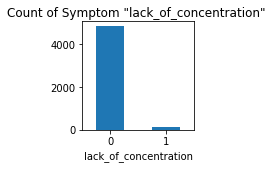

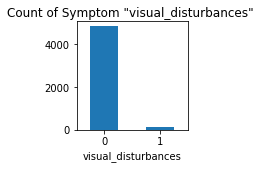

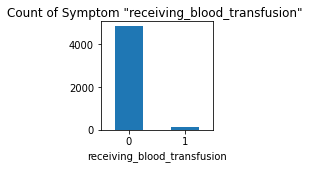

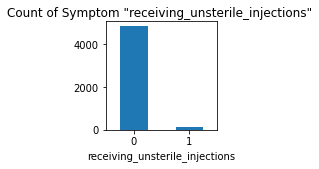

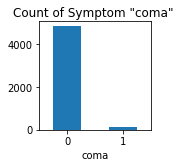

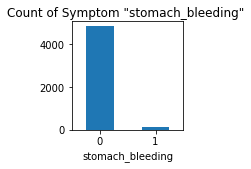

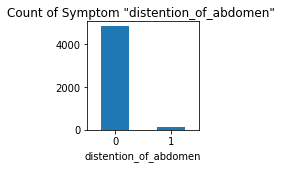

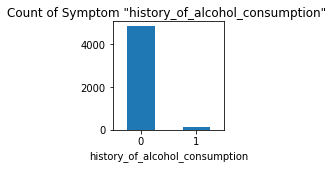

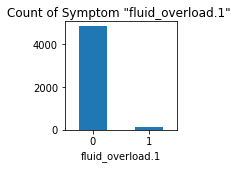

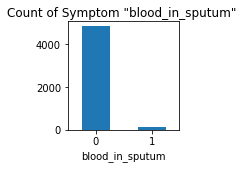

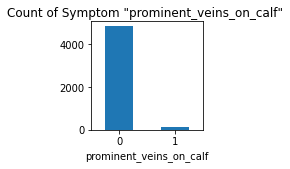

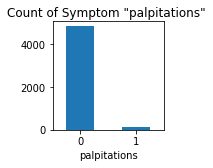

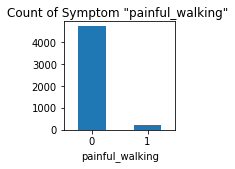

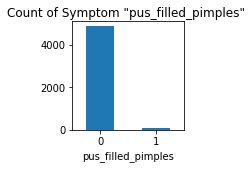

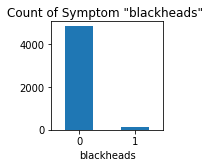

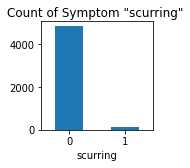

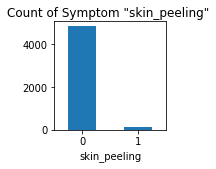

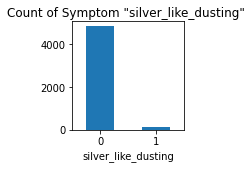

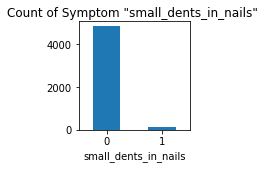

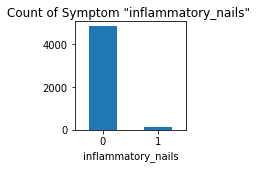

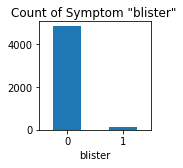

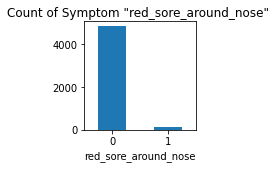

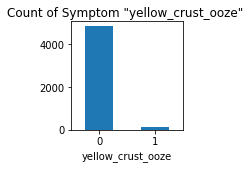

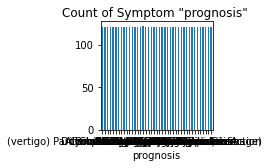

In [15]:
# list of all symptoms
columns = list(df.columns)

#barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = df.groupby(i).size().plot(kind='bar', ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

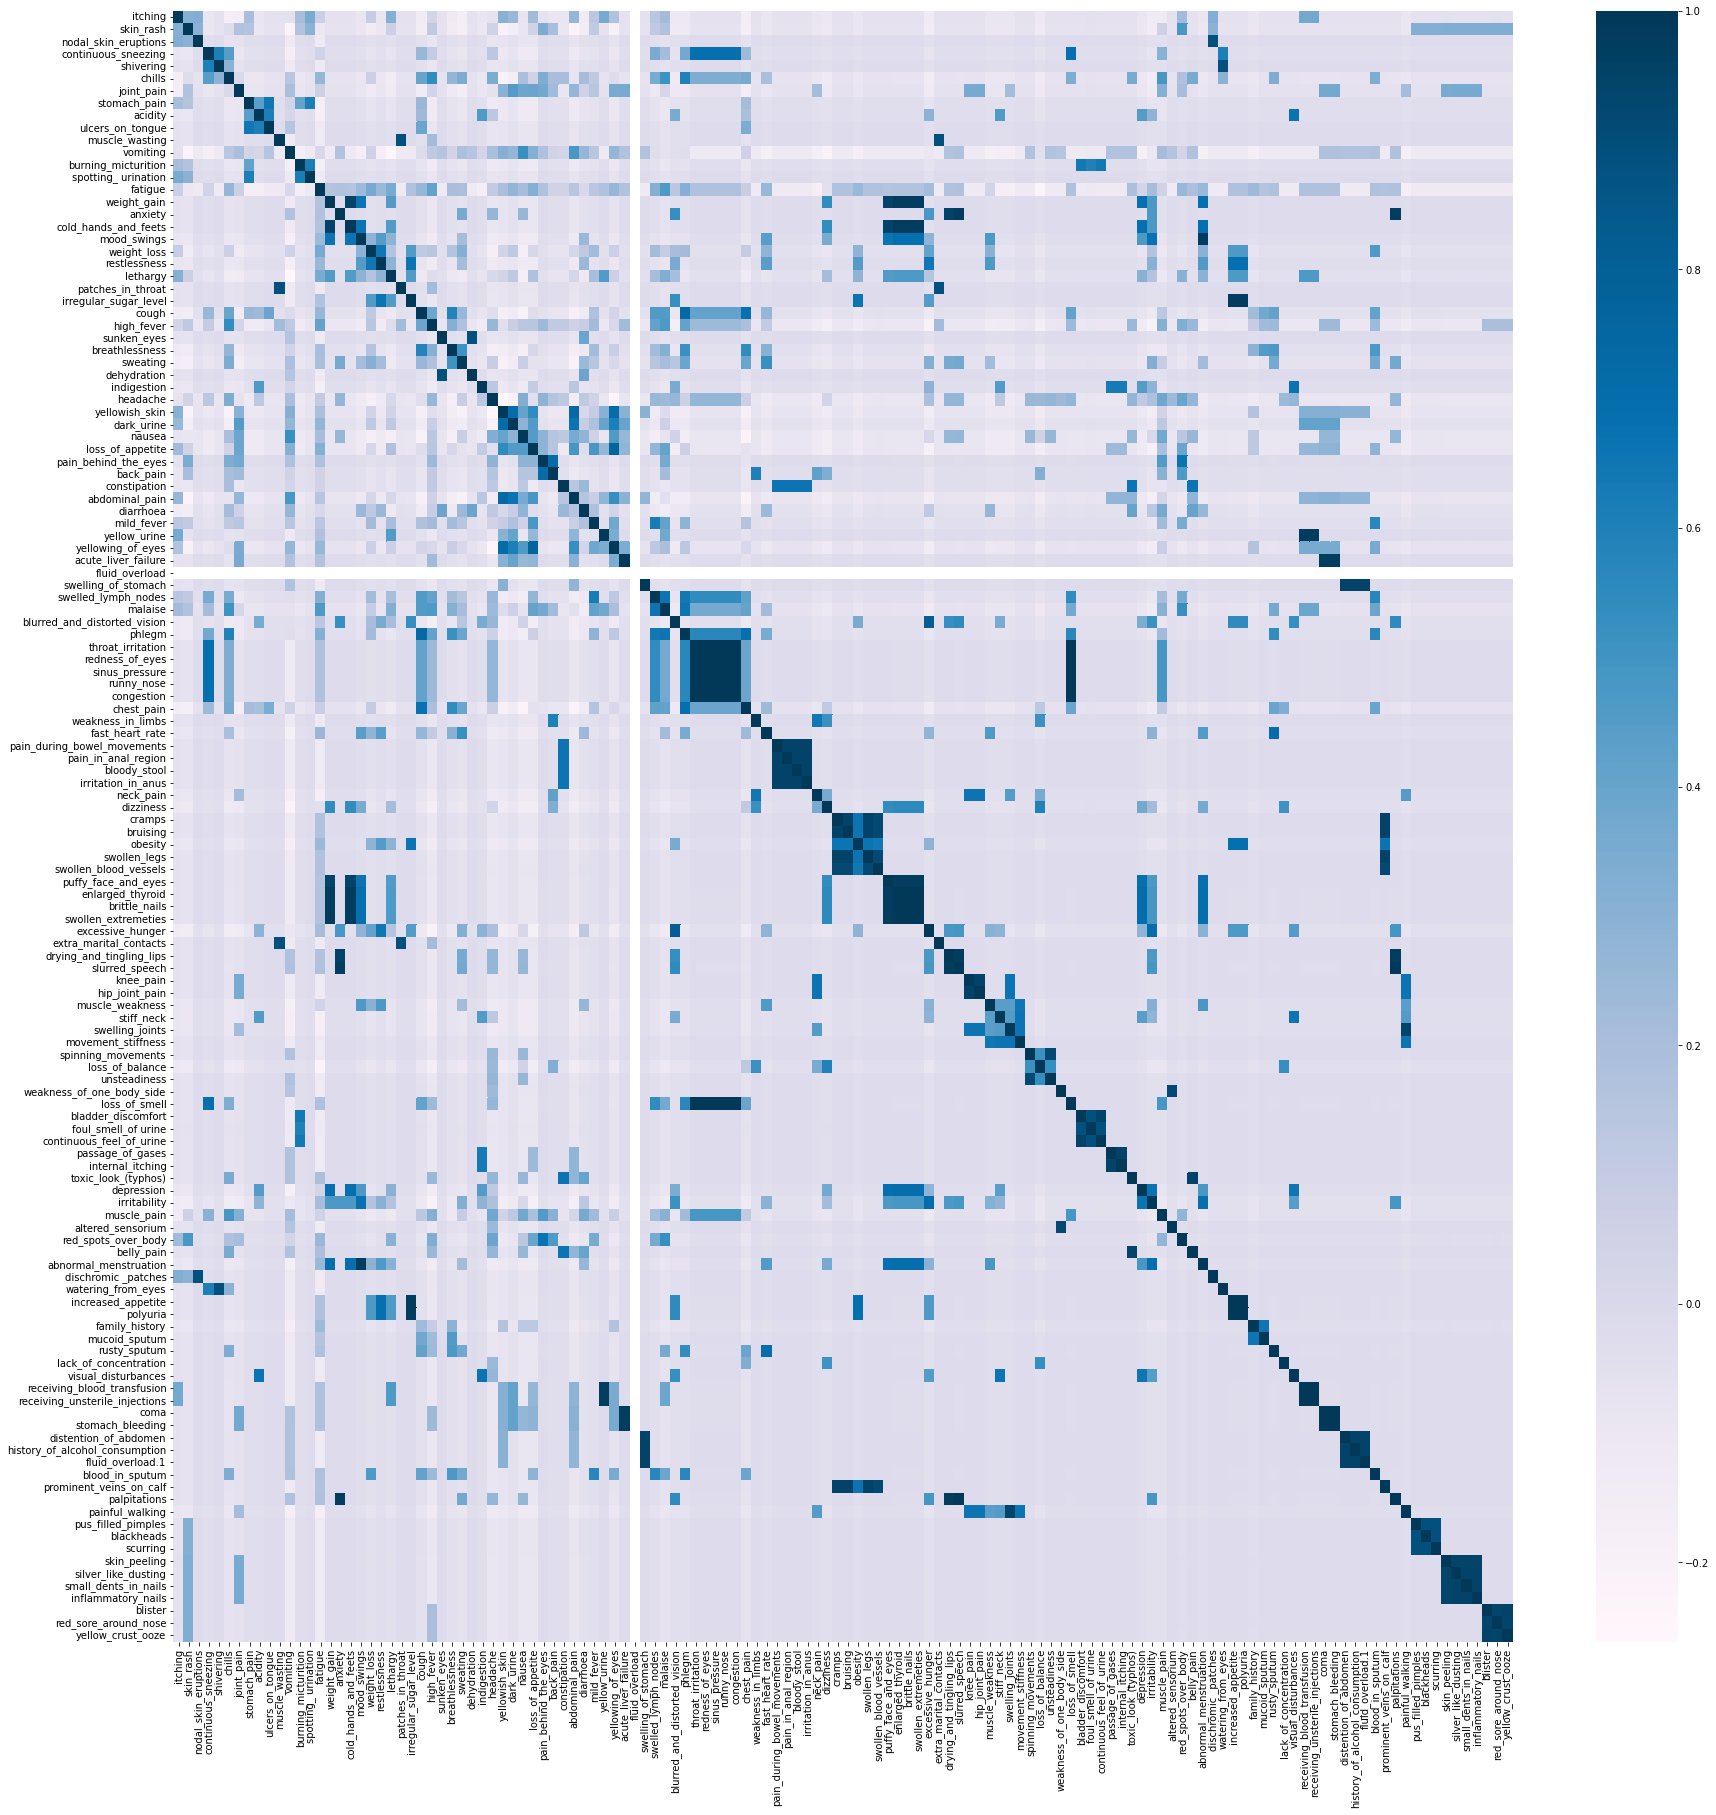

In [16]:
#All occurences of symptoms are mostly absent, which is expected for a Disease Prognosis case study.

#For these quantitative binary attributes of symptoms, their linear relationships and their strengths can be compared using a correlation heatmap.
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap

plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), cmap = 'PuBu', annot = False)
plt.show()


#Almost all symptoms have weak linear correlations, which is indicative that these symptoms do not come hand-in-hand.

In [17]:
#C) Data Partiotioning

In [18]:
# Modeling target variable
#Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.

T = df['prognosis']
X = df.iloc[:,:-2]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(T.tolist())
print(list(le.classes_))
encoded_target = le.transform(T)
print(encoded_target)

['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']
[15 15 15 ... 35 27 15]


In [19]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, encoded_target, test_size=0.20, random_state=42)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (3969, 131)
Train target shape: (3969,)
Test data shape: (993, 131)
Test target shape: (993,)


In [20]:
#splitting into testing and training dataset and printing their shapes
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
T = df.iloc[:, -1]


X_train,X_test,t_train,t_test=train_test_split(X,T,test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (3969, 132)
Train target shape: (3969,)
Test data shape: (993, 132)
Test target shape: (993,)


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

#Applying k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [22]:
#Initialize models (Support Vector classifier, Gaussian Naivye Bayes , Random Forest, Logistic Regression, SGD classifier, KNN Classifier, Ridge Classifier)
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
    "Logistic Regression":LogisticRegression(),
    "SGD Classifier":SGDClassifier(max_iter=1000, tol=1e-3),
    "KNN Classifer":KNeighborsClassifier(n_neighbors=3),
    "Ridge Classifier":RidgeClassifier()
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, encoded_target, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99798387]
Mean Score: 0.9997983870967742
Logistic Regression
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
SGD Classifier
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
KNN Classifer
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Ridge Classifier
Scores: [0.99798793 0.99798793 0.99596774 0.99798387 0.99798387 1.
 1.         1.         1.         0.99798387]
Mean Score: 0.9985895209969493


In [ ]:
#From the above scores we can see that SVC, GaussianNB,Random Forest, SGD, Logistic Regression and KNN Classifier are performing very well and the k-fold cross validation scores are aslo pretty high.
#Hence in order to build an even robust model, we will combine all these models.
#For the rest of the project.

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


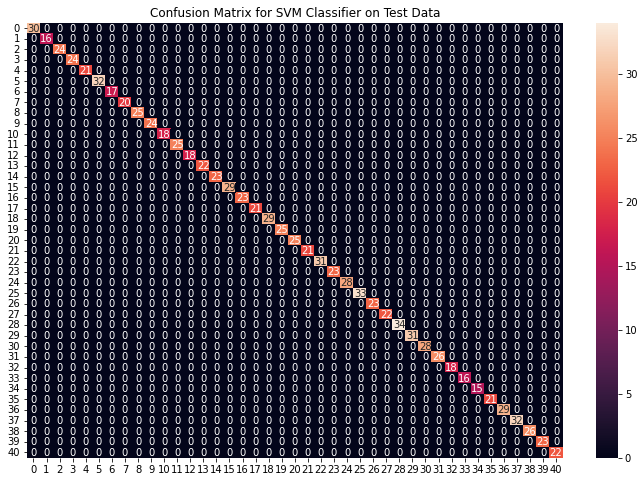

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


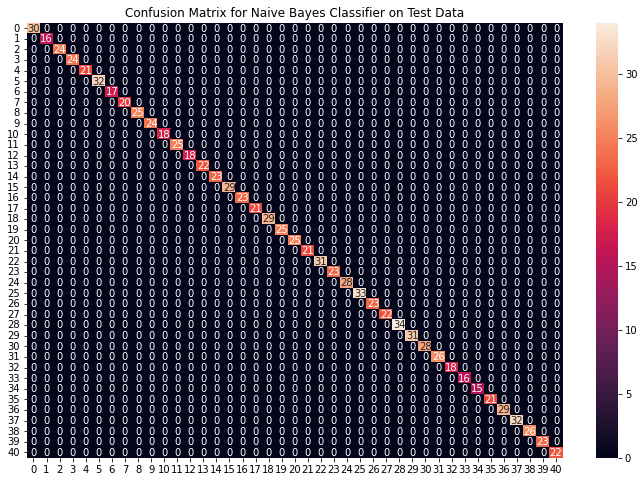

Accuracy on train data by Logistic Regression Classifier: 100.0
Accuracy on test data by Logistic Regression Classifier: 100.0


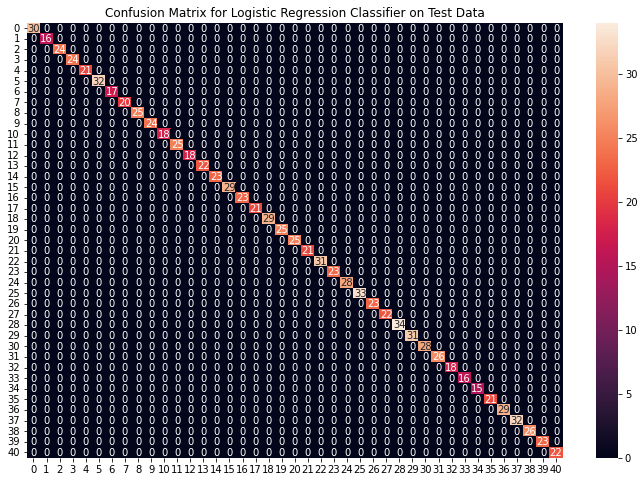

Accuracy on train data by Random Forest Classifier: 79.9949609473419
Accuracy on test data by Random Forest Classifier: 75.12588116817724


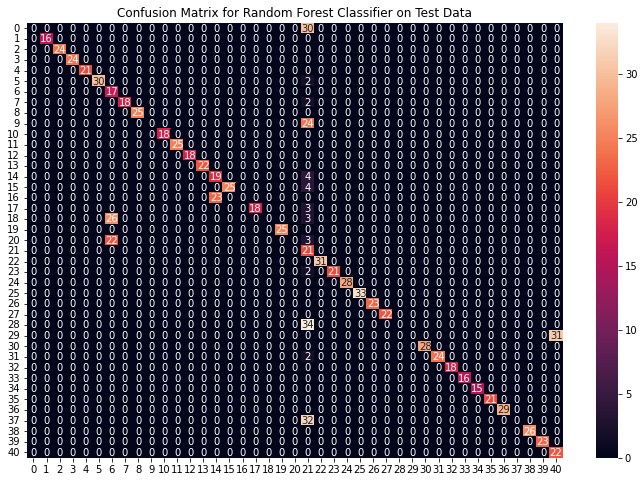

Accuracy on train data by KNN Classifier: 100.0
Accuracy on test data by KNN Classifier: 100.0


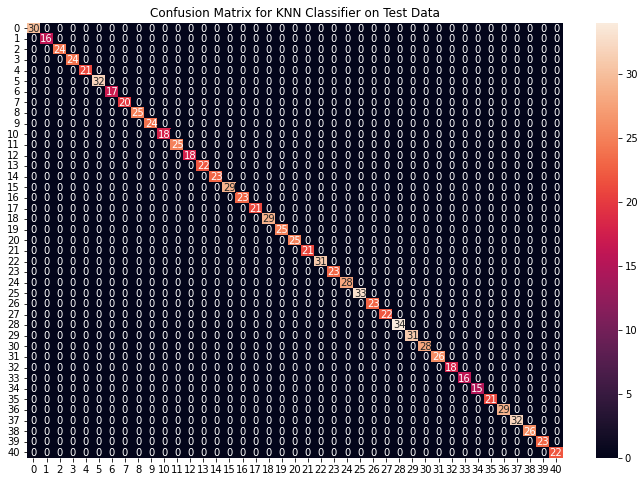

In [25]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, t_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(t_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(t_test, preds)*100}")
cf_matrix = confusion_matrix(t_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, t_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(t_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(t_test, preds)*100}")
cf_matrix = confusion_matrix(t_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


# Training and testing Logistic Regression Classifier
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, t_train)
preds = lr_model.predict(X_test)
print(f"Accuracy on train data by Logistic Regression Classifier\
: {accuracy_score(t_train, lr_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Logistic Regression Classifier\
: {accuracy_score(t_test, preds)*100}")
cf_matrix = confusion_matrix(t_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression Classifier on Test Data")
plt.show()




# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, t_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(t_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(t_test, preds)*100}")
 
cf_matrix = confusion_matrix(t_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Training and testing KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, t_train)
preds = knn_model.predict(X_test)
print(f"Accuracy on train data by KNN Classifier\
: {accuracy_score(t_train, knn_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by KNN Classifier\
: {accuracy_score(t_test, preds)*100}")
 
cf_matrix = confusion_matrix(t_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNN Classifier on Test Data")
plt.show()



Saving Testing.csv to Testing (12).csv
Accuracy on Test dataset by the combined model: 100#0.0


<function matplotlib.pyplot.show>

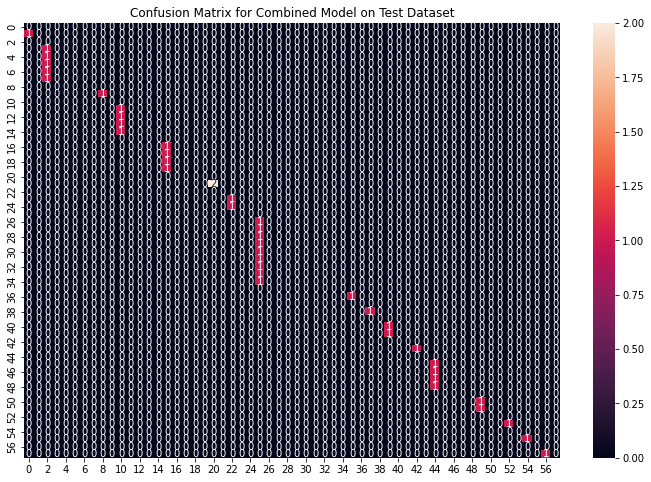

In [44]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_lr_model = LogisticRegression(random_state=0)
final_knn_model = KNeighborsClassifier(n_neighbors=3)
final_svm_model.fit(X, T)
final_nb_model.fit(X, T)
final_rf_model.fit(X, T)
final_lr_model.fit(X,T)
final_knn_model.fit(X,T)
 
# Reading the test data
from google.colab import files
data = files.upload()
import io
test_data = pd.read_csv(io.BytesIO(data['Testing.csv'])) #, names=names)
# Interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()
#test_data = pd.read_csv("C:/Users/ashwa/Downloads/Testing.csv").dropna(axis=1)\
#test_data = pd.read_csv(io.BytesIO(data['Testing.csv']))
 
from sklearn import preprocessing
test_X = test_data.iloc[:, :-1]
#test_Y = encoder.transform(test_data.iloc[:, -1])
test_Y = test_data.iloc[:, -1]
 
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
lr_preds = final_lr_model.predict(test_X)
knn_preds = final_knn_model.predict(test_X)
 
final_preds = [pd.Series.mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]
 
print(f"Accuracy on Test dataset by the combined model: 100\
#{accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show